# Daten-Auslese

In [15]:
# import of packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data paths
ATAC_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/ATAC-seq_called-peaks_ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/RNA-seq_mmc2.csv"
Transcription_exons_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/Transkrips-exon_refFlat.txt"
Cell_population_qc_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/cell-populations_qc-matrices_mmc1.xlsx"
Voluntary_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/voluntary_ImmGenATAC18_AllTFmotifsInOCRs.txt"

# Load data sets
ATAC_seq = pd.read_csv(ATAC_seq_path)
RNA_seq = pd.read_csv(RNA_seq_path)
Cell_population_qc = pd.read_excel(Cell_population_qc_path)


# wie txt einlesen, sortierung iwi komisch
##Transcription_exons
##Voluntary

# Ideen/ Stuff

In [9]:
# peak ATAC histogram
#plt.hist(ATAC_seq["PeakScore"], bins=30, color="skyblue", edgecolor="black")
#plt.title("Histogram of Peak Scores ATAC-seq")
#plt.xlabel("Peak Score")
#plt.ylabel("Frequency")
#plt.show()

# ATAC_seq.info()

# Anzahl der Peaks pro Chromosom
# chrom_counts = ATAC_seq["chrom"].value_counts().sort_index()

#    plt.figure(figsize=(10,5))
#    chrom_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
#    plt.title("Peaks pro Chromosom")
#    plt.xlabel("Chromosom")
#    plt.ylabel("Anzahl der Peaks")
#    plt.xticks(rotation=45)
#    plt.tight_layout()
#    plt.show()


# log10 best p val
#?

# peak signal für Dendritische Zellen, CD4+, Milz (Spleen)

# X-Achse: Summit-Position (Peak-Zentrum)
# ATAC_seq["Summit"] = pd.to_numeric(ATAC_seq["Summit"], errors="coerce")
# x = ATAC_seq["Summit"]

# Y-Achse: Signalstärke für eine bestimmte Zelle
# y = ATAC_seq["LTHSC.34+.BM"]

# chr1 = ATAC_seq[ATAC_seq["chrom"] == "chr1"]

#   plt.figure(figsize=(10, 6))
#    plt.scatter(chr1["Summit"], chr1["LTHSC.34+.BM"], alpha=0.5, s=10, color='teal')
#    plt.title("Signalstärke in LTHSC.34+.BM auf chr1")
#    plt.xlabel("Summit Position auf chr1")
#    plt.ylabel("Signalstärke")
#    plt.grid(True)
#    plt.show()

ATAC_seq.head()
Cell_population_qc.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 98 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ImmGenATAC1219.peakID            512595 non-null  object 
 1   chrom                            512595 non-null  object 
 2   Summit                           512595 non-null  int64  
 3   mm10.60way.phastCons_scores      512595 non-null  float64
 4   _-log10_bestPvalue               512595 non-null  float64
 5   Included.in.systematic.analysis  334879 non-null  float64
 6   TSS                              14292 non-null   object 
 7   genes.within.100Kb               427710 non-null  object 
 8   LTHSC.34-.BM                     512595 non-null  float64
 9   LTHSC.34+.BM                     512595 non-null  float64
 10  STHSC.150-.BM                    512595 non-null  float64
 11  MPP4.135+.BM                     512595 non-null  float64
 12  pr

,SampleName,CellType,ImmGenLab,Lineage,CellFamily,Organ,SortingMarkers,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
0,LTHSC.34-.BM#1,LTHSC.34-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34-,677,22287984,4.58,2470102,10.60,NaN
1,LTHSC.34+.BM#1,LTHSC.34+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34+,2483,28588536,3.17,7675501,7.70,NaN
2,STHSC.150-.BM#1,STHSC.150-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150-CD48-,3660,22170346,3.25,6060045,11.13,NaN
3,MPP4.135+.BM#1,MPP4.135+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135+,10000,24003590,13.83,6128252,18.96,NaN
4,proB.CLP.BM#1,proB.CLP.BM,Hardy,B,B Cell,Bone Marrow,CD19-IgM-CD43+CD24-CD45R-CD93+CD117+IL7Ra+PI-D...,10000,23578208,7.67,6588564,13.21,0.868


In [6]:
#ATAC_seq.duplicated('ImmGenATAC1219.peakID').sum()


np.int64(0)

# Check for natural cutoff QC metrics -> Thresholds

## TSS Enrichment

Text(0.5, 1.0, 'TSS Enrichment Distribution')

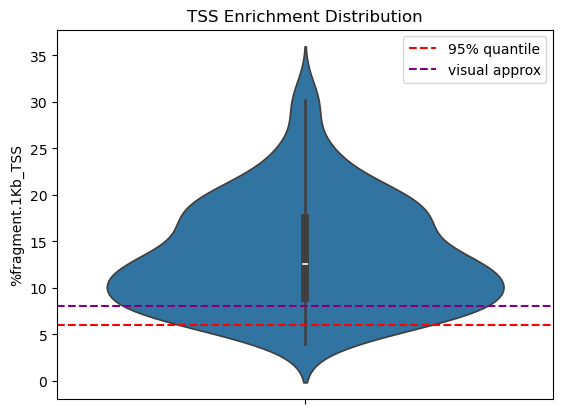

In [23]:
sns.violinplot(data=Cell_population_qc, y="%fragment.1Kb_TSS")
plt.axhline(Cell_population_qc["%fragment.1Kb_TSS"].quantile(.05), color='red', linestyle='--', label="95% quantile")
plt.axhline(8, color='purple', linestyle='--', label="visual approx")
plt.legend()
plt.title("TSS Enrichment Distribution")

# gaussian KDE for more precise blue line

According to Buensrosto et al. (2013) is a TSS Enrichment score (peak?) >8 viewed as good, >10 as excellent.
The 95% quantile will exclude very little data. The cutoff at the visual approximation can be optimized via KDE we can investigate a more precise threshold later.

-> Decide for which?

## Franciton in peaks
### Sudden drops around threshold

## nFrags
### sharp skews?

## Post-filter peak signal
### good?